In [43]:
import os.path as op
import pandas as pd
import numpy as np
from tms_risk.utils.data import Subject
from nilearn import surface
from cortex.polyutils import Surface
import nibabel as nb
from nipype.interfaces.freesurfer import SurfaceTransform

subject = '01'
bids_folder = '/data/ds-tmsrisk'

coords = np.loadtxt(op.join(bids_folder, 'derivatives', 'stim_coordinates', f'sub-{subject}', f'sub-{subject}_coords_warped.txt'))


coords_surface = coords[0]


sub = Subject(subject, bids_folder=bids_folder)
surfinfo = sub.get_surf_info()
target_dir = op.join(bids_folder, 'derivatives', 'ips_masks', f'sub-{subject}', 'anat')

In [44]:
def transform_fsaverage(in_file, fs_hemi, source_subject, bids_folder):

        subjects_dir = op.join(bids_folder, 'derivatives', 'freesurfer')

        sxfm = SurfaceTransform(subjects_dir=subjects_dir)
        sxfm.inputs.source_file = in_file
        sxfm.inputs.out_file = in_file.replace('fsnative', 'fsaverage')
        sxfm.inputs.source_subject = source_subject
        sxfm.inputs.target_subject = 'fsaverage'
        sxfm.inputs.hemi = fs_hemi

        r = sxfm.run()
        return r

In [45]:
pts, polys = surface.load_surf_data(surfinfo['R']['outer'])

In [46]:
# Find the index of the closest vertex to coords_surface
dist = np.linalg.norm(pts - coords_surface, axis=1)
closest_vertex = np.argmin(dist)

surf = Surface(pts, polys)

vertex_mask = surf.get_geodesic_patch(closest_vertex, 1.)['vertex_mask']

/Users/gdehol/mambaforge/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [48]:
from cortex.polyutils import Surface

In [50]:
import cortex

In [53]:
from nilearn import surface

In [ ]:
s

In [55]:
surface.load_surf_mesh(op.join(bids_folder, 'derivatives', 'freesurfer', f'sub-{subject}', 'surf', 'rh.pial'))

mesh(coordinates=array([[  17.55411911, -100.70051575,    7.27403688],
       [  17.0494957 , -100.84899902,    7.15601444],
       [  17.45040131, -100.7842865 ,    6.71470308],
       ...,
       [  -4.50238705,   47.80871201,   17.79526329],
       [   5.16783667,   47.1987114 ,   17.26408482],
       [   4.79079819,   47.19179916,   17.18537712]]), faces=array([[     0,      1,      2],
       [     3,      2,      1],
       [     0,     82,     83],
       ...,
       [150879, 144215, 143666],
       [143666, 144217, 143665],
       [144217, 144215, 144214]], dtype='>i4'))

In [54]:
('/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/rh.pial')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36236/1679669545.py", line 1, in <module>
    surface.load_surf_data('/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/rh.pial')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/surface/surface.py", line 758, in load_surf_data
    check_extensions(surf_data,
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/surface/surface.py", line 818, in check_extensions
    raise ValueError(
ValueError: The input type is not recognized. '/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/rh.pial' was given while valid inputs are a Numpy array or one of the following file formats: '.gii', '.gii.gz', '.mgz', '.nii', '.nii', Freesurfer specific files such as '.area', '.curv', '.sulc', '

In [51]:
cortex.load('/data/ds-tmsrisk/derivatives/freesurfer/fsaverage/surf/rh.inflated')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36236/4119099216.py", line 1, in <module>
    cortex.load('/data/ds-tmsrisk/derivatives/freesurfer/fsaverage/surf/rh.inflated')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/cortex/dataset/dataset.py", line 87, in from_file
    ds.h5 = h5py.File(filename, 'r')
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/h5py/_hl/files.py", line 231, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.

In [49]:
Surface('/data/ds-tmsrisk/derivatives/freesurfer/fsaverage/surf/rh.inflated')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36236/2171800489.py", line 1, in <module>
    Surface('/data/ds-tmsrisk/derivatives/freesurfer/fsaverage/surf/rh.inflated')
TypeError: Surface.__init__() missing 1 required positional argument: 'polys'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/cor

In [47]:
vertex_mask = surf.get_geodesic_patch(closest_vertex, 5)['vertex_mask']
im = nb.gifti.GiftiImage(darrays=[nb.gifti.GiftiDataArray(vertex_mask.astype(np.float32))])
target_fn =  op.join(target_dir, f'sub-{subject}_space-fsnative_desc-NPCr5mm_geodesic_hemi-R.anat.gii')
nb.save(im, target_fn)
transform_fsaverage(target_fn, 'rh', f'sub-{subject}', bids_folder)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36236/2206644232.py", line 5, in <module>
    transform_fsaverage(target_fn, 'rh', f'sub-{subject}', bids_folder)
  File "/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36236/4027455075.py", line 12, in transform_fsaverage
    r = sxfm.run()
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/nipype/interfaces/freesurfer/base.py", line 149, in run
    return super(FSCommand, self).run(**inputs)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/nipype/interfaces/base/core.py", line 398, in run
    runtime = self._run_interface(runtime)
  File "/Users/gdehol/mambaforge/lib/python3.10/site-packages/nipype/interfaces/base/core.py", line 753, in _run_interface
    raise IOError(
OSError

In [8]:
closest_vertex

13538

In [24]:
import os
from nipype.interfaces.utility import Function
from nipype import Workflow, Node


def apply_spherical_registration(subject_id, hemi, vertex_id, freesurfer_home="/Users/gdehol/freesurfer"):
    import subprocess
    import os
    import os.path as op


    # Construct the full command
    cmd = [
        f"{freesurfer_home}/bin/mris_apply_reg",
        "--src", op.join(os.environ['SUBJECTS_DIR'], subject_id),
        "--trg", "fsaverage",
        # "--hemi", hemi,
        "--srcsurfval", str(vertex_id),
        "--trgsurfval", "out_file.txt"
    ]

    # Run the command
    try:
        subprocess.run(cmd, check=True, text=True, capture_output=True)
        # Read the output and return the corresponding vertex
        with open("out_file.txt", "r") as f:
            output_vertex = f.read().strip()
        return output_vertex
    except subprocess.CalledProcessError as e:
        print("Error executing command:", ' '.join(cmd))
        print("Return code:", e.returncode)
        print("Output:", e.output)
        print("Error:", e.stderr)
        return None
# Set up the Function node
apply_reg_node = Node(Function(input_names=["subject_id", "hemi", "vertex_id"],
                               output_names=["output_vertex"],
                               function=apply_spherical_registration),
                      name="apply_reg")


apply_reg_node.inputs.subject_id = f'sub-{subject}'
apply_reg_node.inputs.hemi = 'rh'
apply_reg_node.inputs.vertex_id = closest_vertex

r = apply_reg_node.run()
# apply_reg_node.cmdline

240610-10:45:15,307 nipype.workflow INFO:
	 [Node] Setting-up "apply_reg" in "/private/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/tmp9vktprnx/apply_reg".
240610-10:45:15,322 nipype.workflow INFO:
	 [Node] Executing "apply_reg" <nipype.interfaces.utility.wrappers.Function>
Error executing command: /Users/gdehol/freesurfer/bin/mris_apply_reg --src /data/ds-tmsrisk/derivatives/freesurfer/sub-01 --trg fsaverage --srcsurfval 13538 --trgsurfval out_file.txt
Return code: 255
Output: 
Error: ERROR: Option --srcsurfval unknown

240610-10:45:15,359 nipype.workflow INFO:
	 [Node] Finished "apply_reg", elapsed time 0.033218s.


In [33]:
from nilearn.plotting import plot_surf_roi

In [37]:
surfinfo

{'L': {'inner': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_smoothwm.surf.gii',
  'mid': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_midthickness.surf.gii',
  'outer': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_pial.surf.gii',
  'inflated': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-L_inflated.surf.gii',
  'curvature': '/data/ds-tmsrisk/derivatives/freesurfer/sub-01/surf/lh.curv'},
 'R': {'inner': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_smoothwm.surf.gii',
  'mid': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_midthickness.surf.gii',
  'outer': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_pial.surf.gii',
  'inflated': '/data/ds-tmsrisk/derivatives/fmriprep/sub-01/ses-1/anat/sub-01_ses-1_hemi-R_inflated.surf.gii',
  'curvature': '/data/ds-tmsrisk/derivatives/

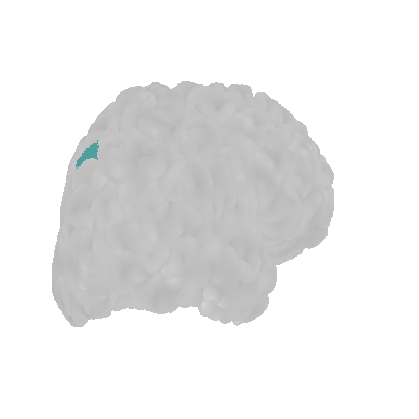

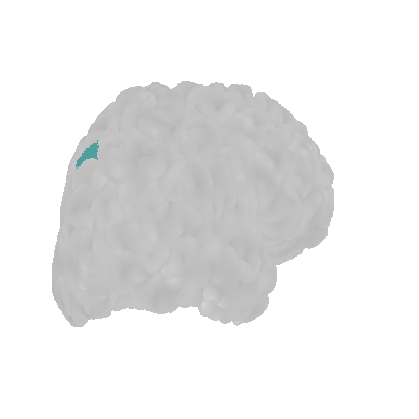

In [38]:
plot_surf_roi(surfinfo['R']['outer'], roi_map=vertex_mask, bg_map=surfinfo['R']['curvature'], hemi='right', view='lateral', bg_on_data=True, darkness=0.5, cmap='viridis')

In [23]:
vertex_mask
s

{'vertex_mask': array([False, False, False, ..., False, False, False]),
 'geodesic_distance': array([8.47300113, 8.64322372, 8.72864545, 8.983338  , 9.33358557,
        9.81033634, 6.37266418, 7.07428045, 7.64619985, 7.08544562,
        7.37486447, 8.14454558, 7.43520568, 8.1838464 , 9.33408681,
        7.76942449, 7.71299251, 9.34543576, 9.6536521 , 9.10077105,
        8.23434845, 4.63129956, 5.08461722, 5.11775036, 6.04199479,
        7.12385052, 5.9277081 , 8.1212377 , 6.48554399, 9.22947324,
        7.30262367, 6.77619719, 9.83758077, 8.58784741, 7.72588916,
        7.02386964, 3.09554612, 2.9911909 , 3.35299169, 3.31715129,
        3.92047335, 4.31066988, 3.87507198, 4.61074267, 5.60050089,
        6.56468188, 5.43950979, 6.63434142, 7.56105271, 5.8556173 ,
        8.91463375, 6.67939564, 6.25870954, 9.96007554, 8.31150173,
        7.49335891, 6.94446515, 6.79076171, 6.53682103, 7.9368293 ,
        7.62045071, 7.15278101, 7.00464467, 2.43043795, 2.63294631,
        3.16034073, 3.5